In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics

In [2]:
loan= pd.read_csv("Loan.csv")

In [3]:
loan.head()

,ID,Age,Experience,Income,ZIP,Family_Members,CCAvg,Education,Mortgage,Personal Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4.0,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3.0,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1.0,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1.0,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4.0,1.0,2,0,0,0,0,0,1


In [4]:
loan[~loan.applymap(np.isreal).all(1)]

,ID,Age,Experience,Income,ZIP,Family_Members,CCAvg,Education,Mortgage,Personal Loan,Securities_Account,CD_Account,Online,CreditCard


In [5]:
loan=loan.dropna()

In [6]:
loan.shape

(4982, 14)

E:\Python3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
E:\Python3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


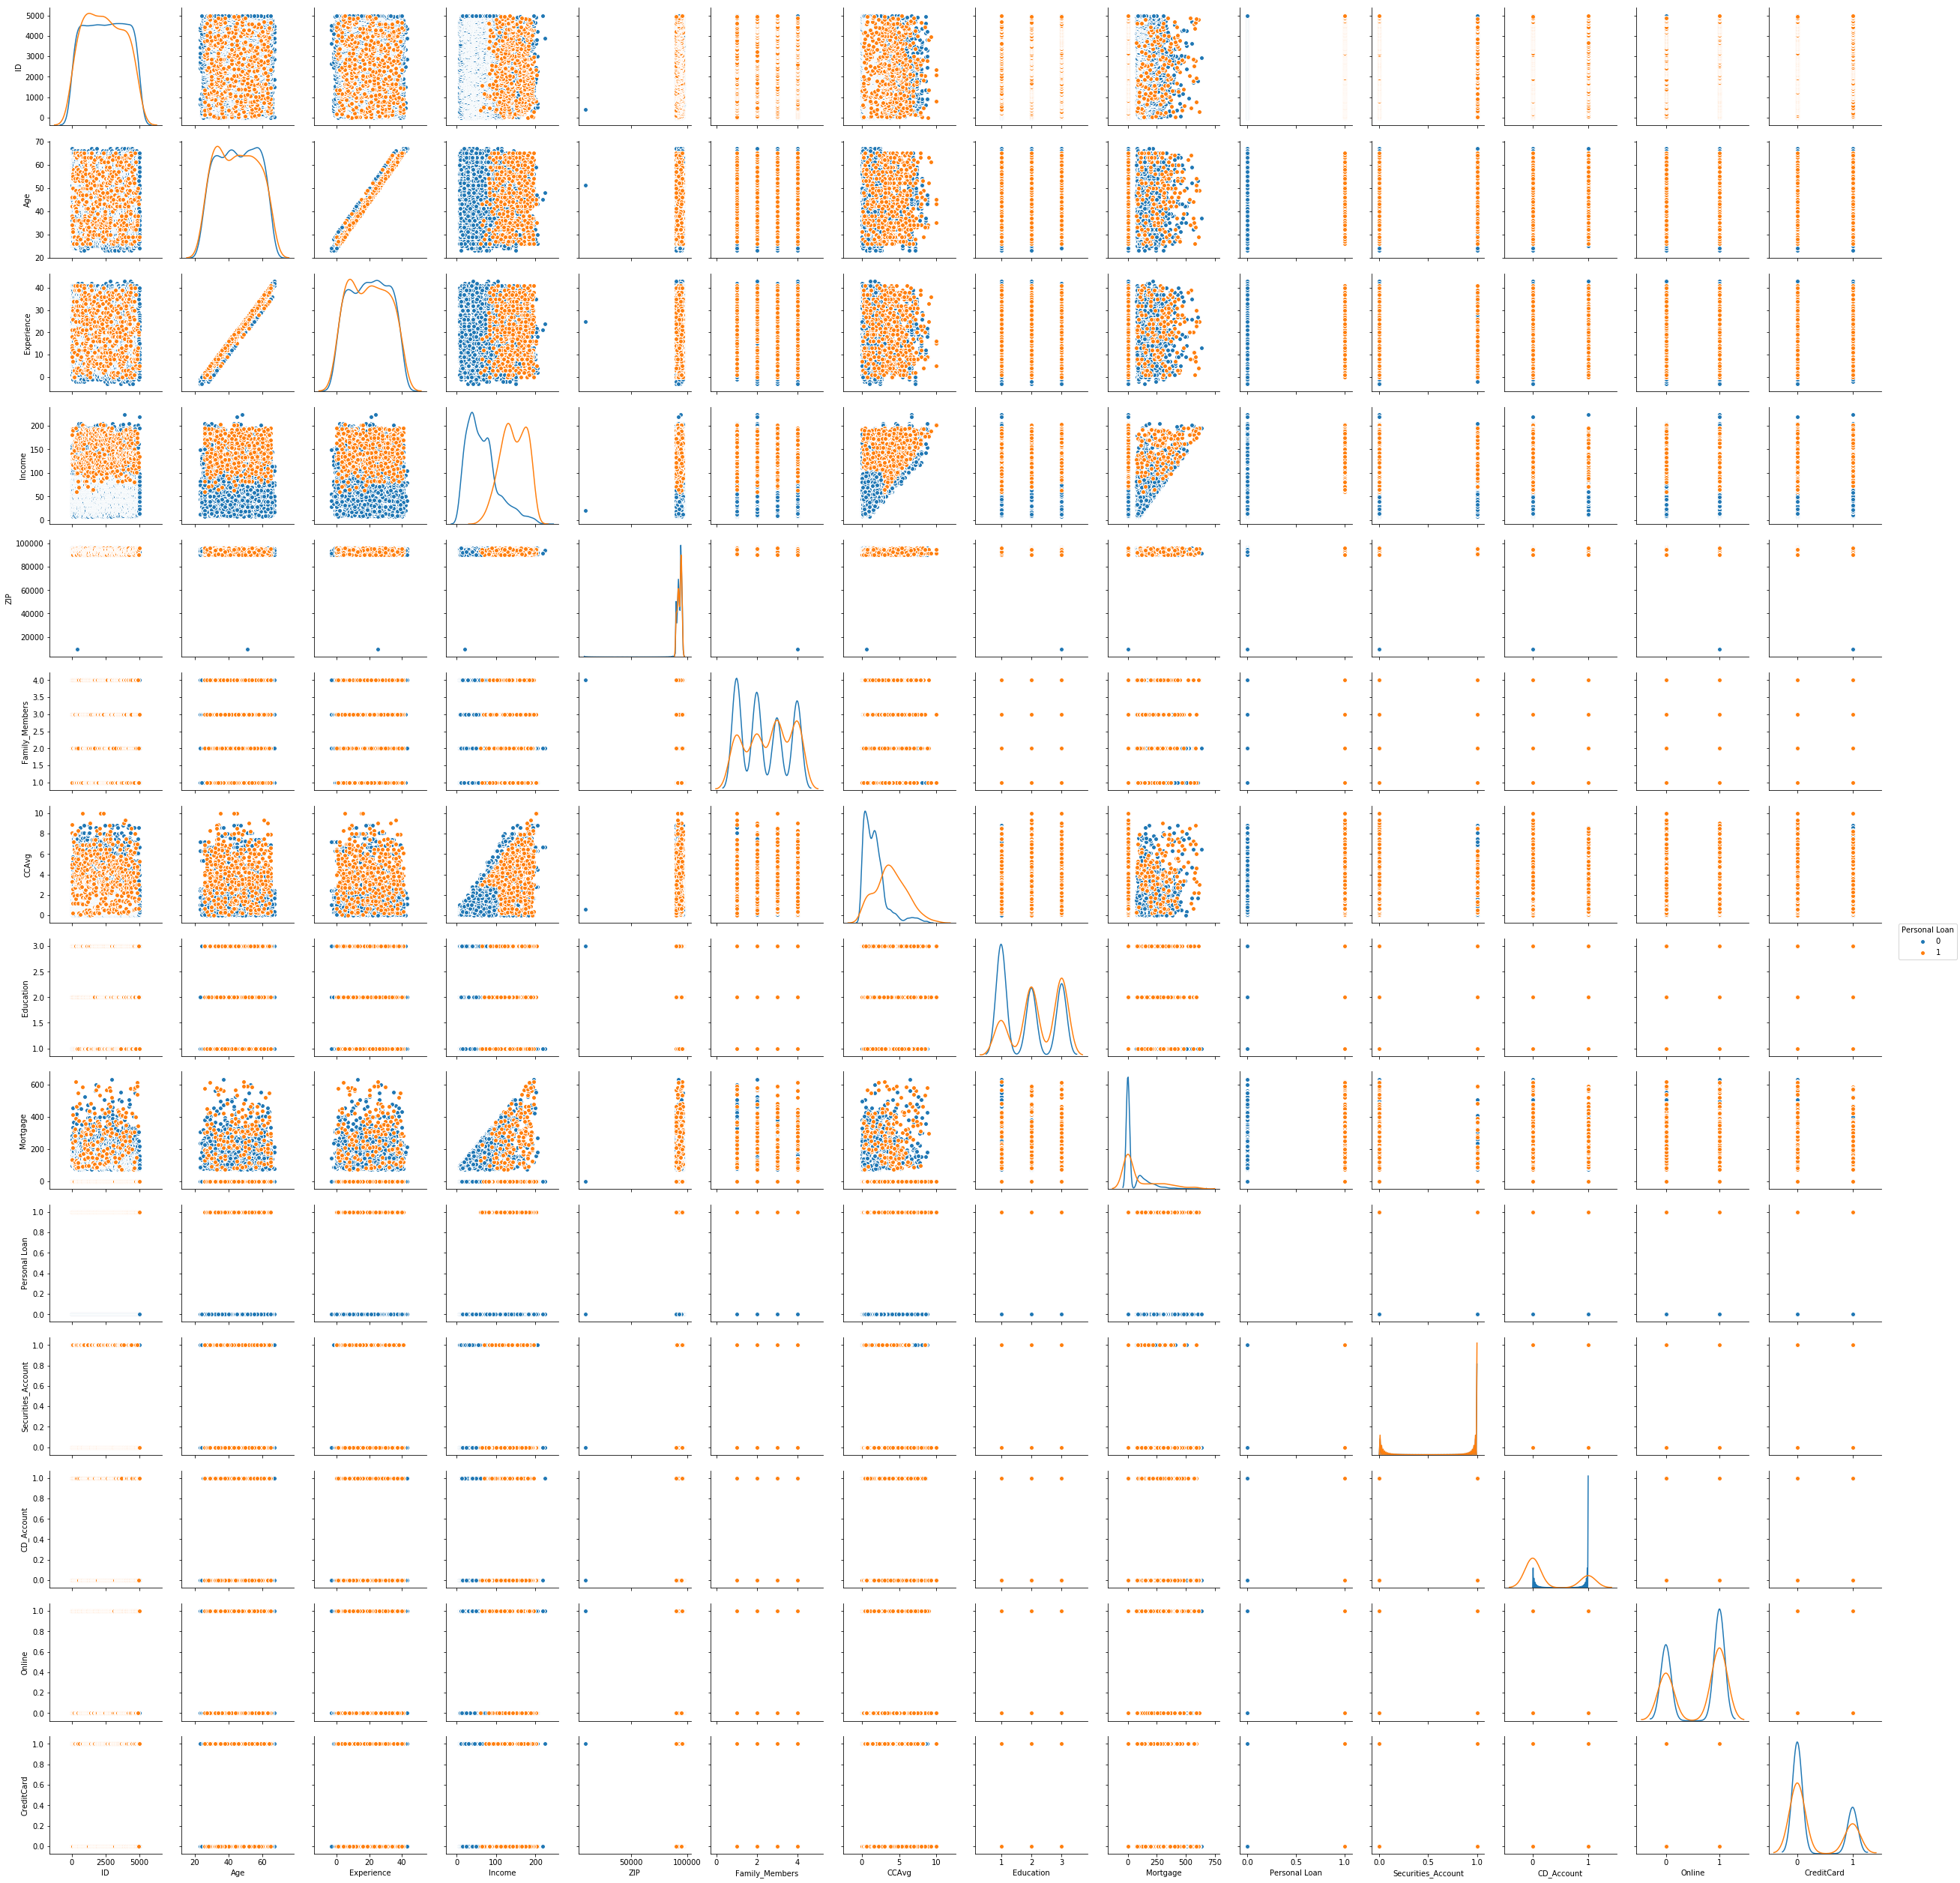

In [19]:
sns.pairplot(loan , hue='Personal Loan' , diag_kind = 'kde')

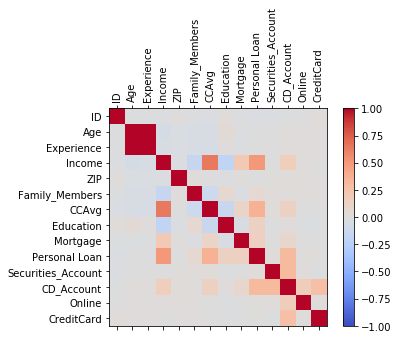

In [21]:
corr = loan.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(loan.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(loan.columns)
ax.set_yticklabels(loan.columns)
plt.show()

In [ ]:
# Not using ID, Age, Experience, ZIP, CCAvg, Mortgage and Online as the distribution rarely distinguishes the ditribution
# of the two categories (in Personal Loan)

In [7]:
X= loan.iloc[:, [3,5,7,10,11,13]]
Y= loan.iloc[:,9]

In [8]:
test_size = 0.30 
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
type(X_train)

pandas.core.frame.DataFrame

In [9]:
from sklearn import preprocessing

In [10]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_test_minmax = min_max_scaler.fit_transform(X_test)

In [11]:
model = LogisticRegression()
model.fit(X_train_minmax, y_train)
y_predict = model.predict(X_test_minmax)
model_score = model.score(X_test_minmax, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))

0.9438127090301003
[[1312   27]
 [  57   99]]


Analyzing the confusion matrix
True Positives (TP): we correctly predicted that the user will take presonal loan 99

True Negatives (TN): we correctly predicted that the user will not take presonal loan 1312

False Positives (FP): we incorrectly predicted that the user will take presonal loan(a "Type I error") 27 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that that the user will not take presonal loan(a "Type II error") 57 Falsely predict negative Type II error


​

In [12]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [13]:
X= loan.iloc[:, [1,2,3,4,5,6,7,8,10,11,12,13]]
Y= loan.iloc[:,9]

In [14]:
test_size = 0.30 
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
type(X_train)

pandas.core.frame.DataFrame

In [15]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_test_minmax = min_max_scaler.fit_transform(X_test)

In [16]:
# creating odd list of K for KNN
myList = list(range(1,20))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_minmax, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

In [17]:
cv_scores

[0.9498178563194868,
 0.9521142367825501,
 0.9492488931547325,
 0.9469516893211193,
 0.9435116236396741,
 0.9412144198060611,
 0.9400641852630786,
 0.9394919333211004,
 0.9380559750824548,
 0.9366208402143587]

In [18]:
classifier = KNeighborsClassifier(n_neighbors=2)  
model=classifier.fit(X_train_minmax, y_train)  

In [19]:
y_pred=model.predict(X_test)

In [20]:
accuracy_score(y_test, y_pred)

0.8956521739130435

In [ ]:
# We found out that the overall performance of the Model is not good compared to the Logistic regression